# Regression:

Regression is a powerful weapon in the arsenal of a data scientist. It is relatively simpler compared to many other models and usually it can easily be explained to a lay man. Another important aspect about linear regression(which is related to the previous point) is its relationship with causation. Usually, it is simpler to establish causation by experiment that is being predicted by regression.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import seaborn as sns

# Data description:

This is about basketball game about which I have absolutely no idea.

After getting data, we first perform our usual rituals of cleaning and then observing the data. 

I have dropped columns having nonnumerical entries. Then, I have plotted few plots to explore the data.



In [57]:
df = pd.read_csv('mlb_elo.csv', encoding='utf-8')
df.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2019-10-30,2019,0,w,HOU,WSN,1599.542804,1584.363378,0.574617,0.425383,...,56.920649,61.723620,0.989236,27.776342,0.515172,0.484828,1587.973463,1583.382133,2,6
1,2019-10-29,2019,0,w,HOU,WSN,1605.069000,1578.837182,0.595209,0.404791,...,62.975093,60.272516,28.723451,21.776276,0.594638,0.405362,1591.026009,1580.329587,2,7
2,2019-10-27,2019,0,w,WSN,HOU,1584.005206,1599.900976,0.515546,0.484454,...,49.433198,66.891460,-29.811205,47.888341,0.373102,0.626898,1576.189971,1595.165625,1,7
3,2019-10-26,2019,0,w,WSN,HOU,1589.985555,1593.920627,0.538425,0.461575,...,56.003581,51.251046,0.823752,-24.893480,0.586974,0.413026,1578.722119,1592.633477,1,8
4,2019-10-25,2019,0,w,WSN,HOU,1593.827376,1590.078806,0.553044,0.446956,...,54.036365,57.096801,-9.053908,2.440389,0.526852,0.473148,1583.715416,1587.640180,1,4


In [58]:
df.drop_duplicates(inplace=True)
df.shape

(220010, 26)

In [59]:
df.dropna()
df.shape

(220010, 26)

In [60]:
mod_df = df.drop(columns=['date','season','playoff', 'neutral','team1','team2', 'pitcher1_rgs', 'pitcher2_rgs', 'pitcher1', 'pitcher2'])
#mod_df[mod_df==np.inf]=np.nan
mod_df =mod_df[~mod_df.isin([np.nan, np.inf, -np.inf]).any(1)]
mod_df.fillna(mod_df.mean(),inplace=True)
mod_df.head()

,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,1599.542804,1584.363378,0.574617,0.425383,1594.882297,1589.023885,1591.026009,1580.329587,0.989236,27.776342,0.515172,0.484828,1587.973463,1583.382133,2,6
1,1605.069000,1578.837182,0.595209,0.404791,1599.542804,1584.363378,1595.165625,1576.189971,28.723451,21.776276,0.594638,0.405362,1591.026009,1580.329587,2,7
2,1584.005206,1599.900976,0.515546,0.484454,1578.837182,1605.069000,1578.722119,1592.633477,-29.811205,47.888341,0.373102,0.626898,1576.189971,1595.165625,1,7
3,1589.985555,1593.920627,0.538425,0.461575,1584.005206,1599.900976,1583.715416,1587.640180,0.823752,-24.893480,0.586974,0.413026,1578.722119,1592.633477,1,8
4,1593.827376,1590.078806,0.553044,0.446956,1589.985555,1593.920627,1586.428733,1584.926863,-9.053908,2.440389,0.526852,0.473148,1583.715416,1587.640180,1,4


In [61]:
mod_df.dtypes

elo1_pre        float64
elo2_pre        float64
elo_prob1       float64
elo_prob2       float64
elo1_post       float64
elo2_post       float64
rating1_pre     float64
rating2_pre     float64
pitcher1_adj    float64
pitcher2_adj    float64
rating_prob1    float64
rating_prob2    float64
rating1_post    float64
rating2_post    float64
score1            int64
score2            int64
dtype: object

# Data correlation:
I have plotted heat map and correlation matrix for the data.

This is useful in detecting significant relationship between any two variables. Any significant dependency between two variables may require one variable to be dropped.

Any two variables having (absolute value of) correlation coefficient higher than 0.7 or so are considered to be significantly related with each other. We can clearly see from the matrix there are number variables having such state. e.g. elo1post vs rati1_pre. 

If I would hav elittle knowledge about the game, I could explain why these two are strongly related. However, being a data science student, it dictates me to drop one of these two variable while building the models.

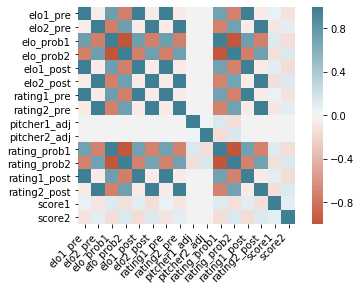

In [15]:
corr = mod_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [17]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = mod_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
elo1_pre,1,-0.0623575,0.729628,-0.729628,0.997982,-0.0624611,0.997127,-0.0628752,0.000583664,0.00428423,0.713887,-0.713887,0.995194,-0.0630035,0.0777162,-0.112932
elo2_pre,-0.0623575,1,-0.727186,0.727186,-0.0630388,0.998001,-0.0630787,0.997156,0.00785469,0.00335074,-0.711558,0.711558,-0.0638026,0.995231,-0.108382,0.0961088
elo_prob1,0.729628,-0.727186,1,-1,0.728703,-0.725884,0.728119,-0.725563,-0.00468058,0.000889976,0.978451,-0.978451,0.727281,-0.724328,0.126671,-0.143895
elo_prob2,-0.729628,0.727186,-1,1,-0.728703,0.725884,-0.728119,0.725563,0.00468058,-0.000889976,-0.978451,0.978451,-0.727281,0.724328,-0.126671,0.143895
elo1_post,0.997982,-0.0630388,0.728703,-0.728703,1,-0.0671532,0.995123,-0.0635704,0.00167398,0.00301211,0.71329,-0.71329,0.997157,-0.0676411,0.115892,-0.153443
elo2_post,-0.0624611,0.998001,-0.725884,0.725884,-0.0671532,1,-0.063188,0.99518,0.00674422,0.00460443,-0.71059,0.71059,-0.0678539,0.997185,-0.146251,0.136417
rating1_pre,0.997127,-0.0630787,0.728119,-0.728119,0.995123,-0.063188,1,-0.0638752,-0.00269256,0.00430941,0.716035,-0.716035,0.998036,-0.0639759,0.077506,-0.113061
rating2_pre,-0.0628752,0.997156,-0.725563,0.725563,-0.0635704,0.99518,-0.0638752,1,0.00818151,-0.000460169,-0.713472,0.713472,-0.0645835,0.998054,-0.108045,0.0963886
pitcher1_adj,0.000583664,0.00785469,-0.00468058,0.00468058,0.00167398,0.00674422,-0.00269256,0.00818151,1,0.0538697,0.147137,-0.147137,-0.00290271,0.00837817,-0.017456,-0.035631
pitcher2_adj,0.00428423,0.00335074,0.000889976,-0.000889976,0.00301211,0.00460443,0.00430941,-0.000460169,0.0538697,1,-0.149871,0.149871,0.00431,-0.000469429,-0.0234905,0.00315182


#### Preparing data for regression models:

Basically, we will split the data in to two sets: one having all predictors and one being the target predictor(in our case, the target ones are score1 and score 2).

Secondly, we will split the tow sets in to two further substes: one is training data set on which any model will be trained and second one is test data set on which the efficiency and accuracy of the model will be tested. 

In [62]:
target_score_df = mod_df.drop(columns=['score1','score2'])

In [63]:
# Splitting the aata into training and test data set
from sklearn.model_selection import train_test_split

team1x_train, team1x_test, team1y_train, team1y_test = train_test_split(target_score_df, mod_df.score1, random_state=10)

# Reegression model for team-1:

In [64]:
from sklearn.linear_model import LinearRegression

# Linear Regression 

team1Reg = LinearRegression()
team1Reg.fit(team1x_train,team1y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
team1Predict_train = team1Reg.predict(team1x_train)
team1Predict_test = team1Reg.predict(team1x_test)

### Mean-square error:
Mean square error computes the distance between the value predicted by our model and the actual value. The lesser MSE is the better our prediction is. 

We can clearly see the mse values of trainig data set and test data set are pretty close to each other. This also is being reflected by the MSE plot shown below. This is a good thing about the model as it shows there is no overfitting or so.

In [67]:

#Mean-square error for team-1

lfTrainTeam1MSE = round(np.mean(np.subtract(team1y_train.values,team1Predict_train) ** 2),2)
print(lfTrainTeam1MSE)
lfTestTeam1MSE = round(np.mean(np.subtract(team1y_test.values,team1Predict_test) ** 2),2)
print(lfTestTeam1MSE)

6.66
6.72


Text(0.5, 1.0, 'Residual Plot for Team 1 - Train:Green and Test:Orange')

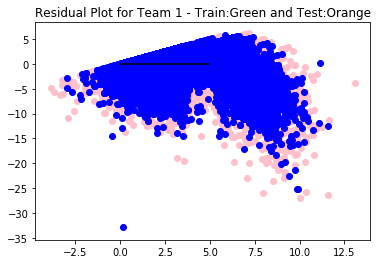

In [43]:
plt.scatter(team1Predict_train,np.subtract(team1Predict_train,team1y_train.values),c='pink')
plt.scatter(team1Predict_test,np.subtract(team1Predict_test,team1y_test.values),c='blue')
plt.hlines(y=0,xmin=0,xmax=5)

plt.title('Residual Plot for Team 1 - Train:Pink and Test:Blue')

# Regression model for team-2:

In [68]:
from sklearn.model_selection import train_test_split

team2x_train, team2x_test, team2y_train, team2y_test = train_test_split(target_score_df, mod_df.score2, random_state=10)

from sklearn.linear_model import LinearRegression
team2Reg = LinearRegression()
team2Reg.fit(team2x_train,team2y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
#MSE for Team 2

team2Predict_train = team2Reg.predict(team2x_train)
team2Predict_test = team2Reg.predict(team2x_test)

lfTrainTeam2MSE = round(np.mean(np.subtract(team2y_train.values,team2Predict_train) ** 2),2)
lfTestTeam2MSE = round((np.mean(np.subtract(team2y_test.values,team2Predict_test) ** 2)),2)

print(lfTrainTeam2MSE)
print(lfTestTeam2MSE)

5.97
6.07


Text(0.5, 1.0, 'Residual Plot for Team 2 - Train:Green and Test:Orange')

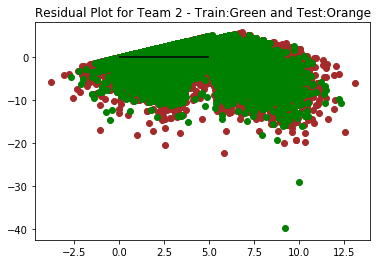

In [70]:
plt.scatter(team2Predict_train,np.subtract(team2Predict_train,team2y_train.values),c='brown')
plt.scatter(team2Predict_test,np.subtract(team2Predict_test,team2y_test.values),c='green')
plt.hlines(y=0,xmin=0,xmax=5)

plt.title('Residual Plot for Team 2 - Train:Green and Test:Orange')

# Random forest regressior for Team 1 and Team 2:

This is another similar model I have tried for this data. For simplicity, I have used only 10 trees(as my computer was crashing beyond 100 or so). 

From MSE, we can see that this is not a better model than linear regression model above.

In [71]:
# Regression Model - Team 1
from sklearn.ensemble import RandomForestRegressor
# using model of 10 decision trees
rfTeam1 = RandomForestRegressor(n_estimators = 10, random_state = 37)
rfTeam1.fit(team1x_train,team1y_train);
# MSE for Team 1

rfPredictTrain1 = rfTeam1.predict(team1x_train)
# Calculate the Square errors
rfErrorTrain1 = (rfPredictTrain1 - team1y_train)**2
rfTrain1MSE =  round(np.mean(rfErrorTrain1),2)
print('Mean Square Error Train:', rfTrain1MSE)



rfPredict1 = rfTeam1.predict(team1x_test)
rfErrorTeam1 = (rfPredictTeam1 - team1y_test)**2
rfTestTeam1MSE = round(np.mean(rfErrorTeam1),2)
print('Mean Square Error Test:', rfTestTeam1MSE)

Mean Square Error Train: 1.04
Mean Square Error Test: 5.91


In [72]:
# Regression for Team 2

from sklearn.ensemble import RandomForestRegressor
rfTeam2 = RandomForestRegressor(n_estimators = 10, random_state = 39)
rfTeam2.fit(team2x_train,team2y_train);

#int Random Forest Regression Mean Square Error for Team 2

rfPredictTrain2 = rfTeam2.predict(team2x_train)
# Calculate the Square errors
rfErrorTrain2 = (rfPredictTrain2 - team2y_train)**2
# Print out the mean absolute error (mae)
rfTrain2MSE =  round(np.mean(rfErrorTrain2),2)
print('Mean Square Error Train:', rfTrainTeam2MSE)


# Use the forest's predict method on the test data
rfPredict2 = rfTeam2.predict(team2x_test)
# Calculate the absolute errors
rfErrorTeam2 = (rfPredict2 - team2y_test) **2
# Print out the mean absolute error (mae)
rfTestTeam2MSE = round(np.mean(rfErrorTeam2),2)
print('Mean Square Error Test:', rfTestTeam2MSE)

Mean Square Error Train: 1.02
Mean Square Error Test: 5.77


# Conclusion:
From the above coefficient matrix, we can delete some of the unncessary predictors to better our model. Moreover, we can introduce nonlinear parameters to see whether we get any better result.

Most importantly, we have not checked the assumptions of linear regression before applying. If some of the assumptions are violated siginifcantly, we will get erroneous result.

However, for the time being it is a good enough fit for our data set.
